# Telcom Customer Churn Data Analysis

Churn is a one of the biggest problem in the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.

In [19]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
import matplotlib.ticker as mtick # For specifying the axes tick format 

from subprocess import check_output



# Dataset Description:

customerID: Customer ID

gender: Customer gender (female, male)

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

#Converting TotalCharges column data into float numerical value

In [2]:
def conv(val):
    if not val:
        return 0    
    try:
        return np.float64(val)
    except:        
        return np.float64(0)

#df = pd.read_csv(csv_file,)
telecom_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',converters={'TotalCharges':conv},low_memory=False)

In [3]:
telecom_data['TotalCharges'] = telecom_data['TotalCharges'].replace(" ", 0).astype('float32')

There are missing values in "Total Charges" column of telecom data set, and we are going to replace it with 0 value.

In [48]:
telecom_data.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.500000,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.400024,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.899994,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.050049,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.949951,No


In [5]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float32
Churn               7043 non-null object
dtypes: float32(1), float64(1), 

In [6]:
telecom_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.732178
std,0.368612,24.559481,30.090047,2266.794434
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.549988
50%,0.000000,29.000000,70.350000,1394.550049
75%,0.000000,55.000000,89.850000,3786.599976
max,1.000000,72.000000,118.750000,8684.799805


In [7]:
telecom_data.shape
#sns.countplot()

(7043, 21)

In [8]:
telecom_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [10]:
profile = pandas_profiling.ProfileReport(telecom_data)
profile.to_file(outputfile="telecom_churn_before_preprocessing.html")

## Data Exploration

Let us first start with exploring our data set, to better understand the patterns in the data and potentially form some hypothesis. First we will look at the distribution of individual variables and then slice and dice our data for any interesting trends.

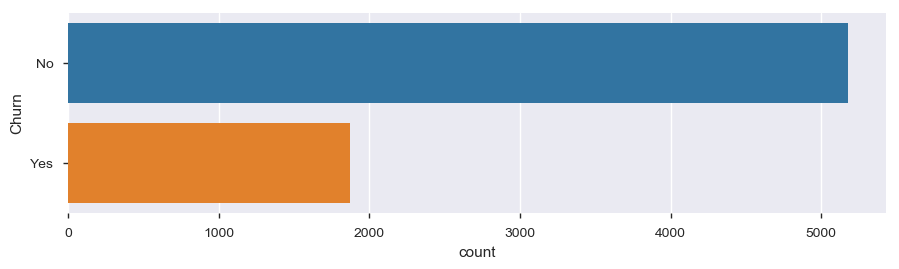

In [11]:
sns.catplot(y="Churn", kind="count", data=telecom_data, height=2.6, aspect=3.5)

In [11]:
#count of online services availed and new coulmn assigned with 'Count_OnlineServices'
telecom_data['Count_OnlineServices'] = (telecom_data[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport',
       'StreamingTV', 'OnlineBackup']] == 'Yes').sum(axis=1)

In [12]:
telecom_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Count_OnlineServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.500000,No,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes,0


Text(0.5, 1.0, 'No. of Customers by Contract Type')

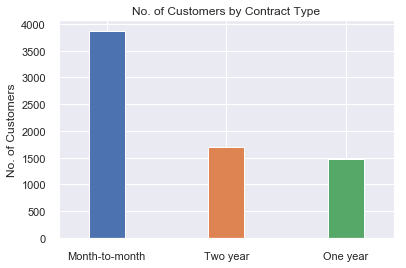

In [52]:
ax = telecom_data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('No. of Customers')
ax.set_title('No. of Customers by Contract Type')

It can be seen from this plot most of the customers are in the month to month contract. While there are equal number of customers in the 1 year and 2 year contracts

Text(0.5, 1.0, 'Two Year Contract')

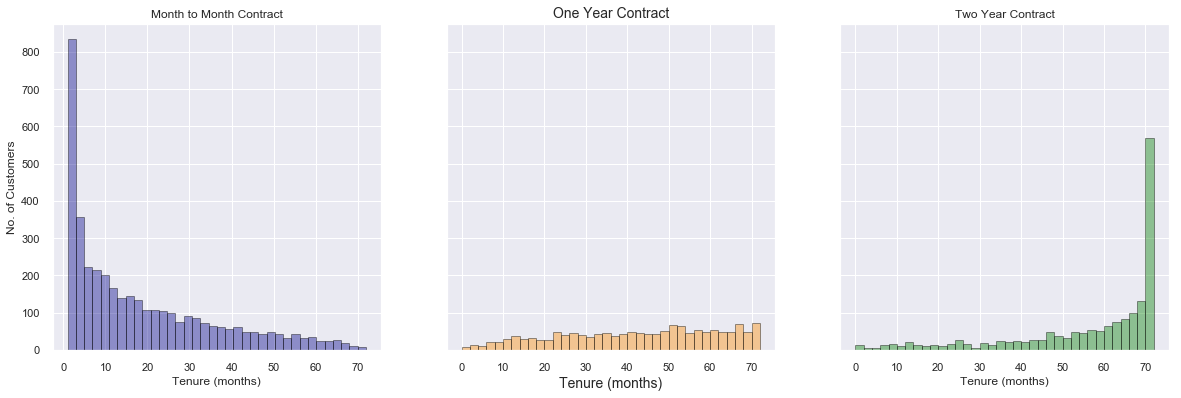

In [57]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(telecom_data[telecom_data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(telecom_data[telecom_data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkorange',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(telecom_data[telecom_data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'green',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. 

This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. 



Text(0.5, 0, 'Number of Online Services')

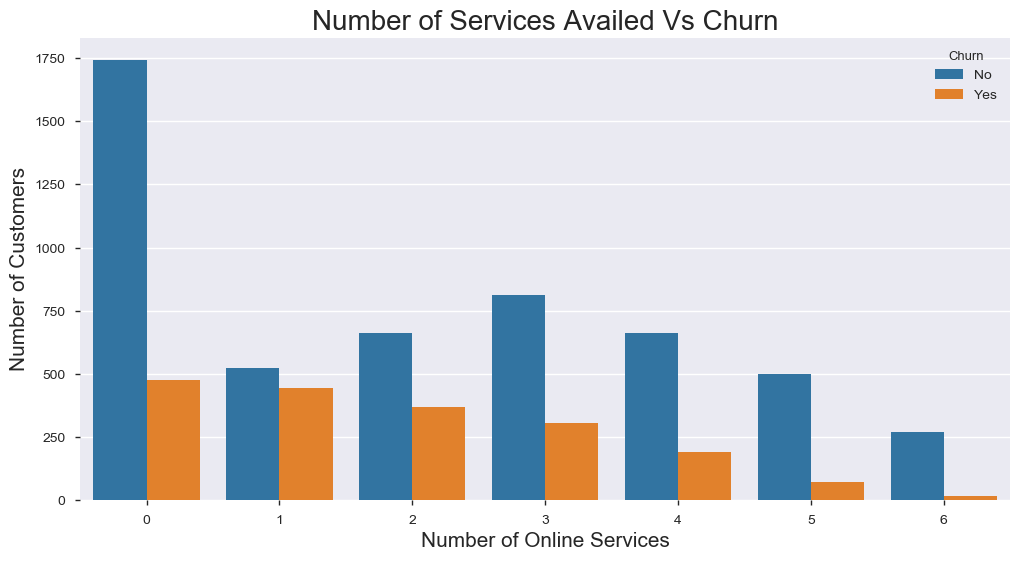

In [13]:

plt.figure(figsize=(12,6))
ax = sns.countplot(x='Count_OnlineServices', hue='Churn', data=telecom_data)
ax.set_title('Number of Services Availed Vs Churn', fontsize=20)
ax.set_ylabel('Number of Customers', fontsize=15)
ax.set_xlabel('Number of Online Services', fontsize=15)

From the above plot : Customers with most online services are churning least.  Customers who are availing just one online service are churning highest. As the number of online services increases beyond one service, churning least

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


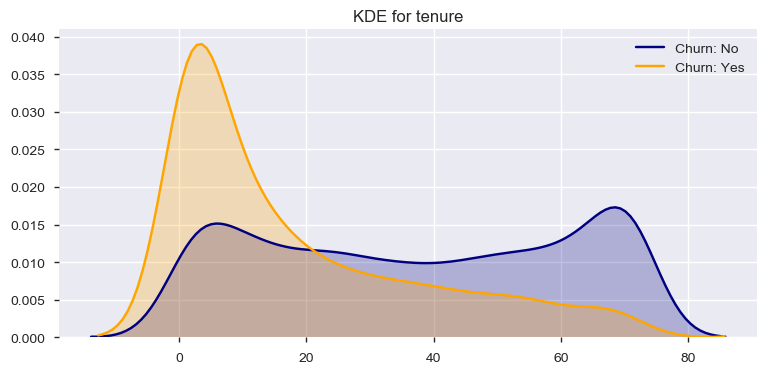

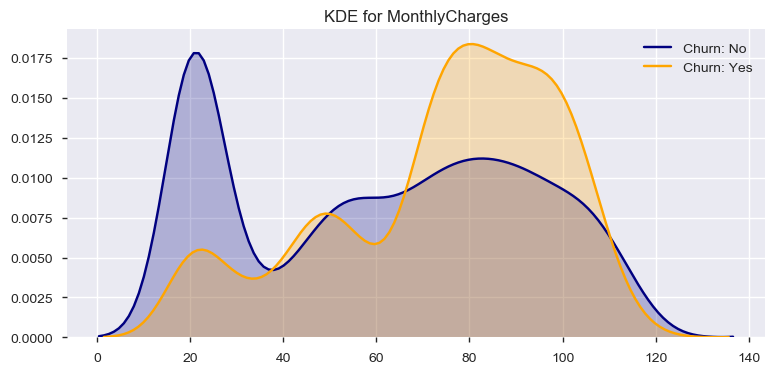

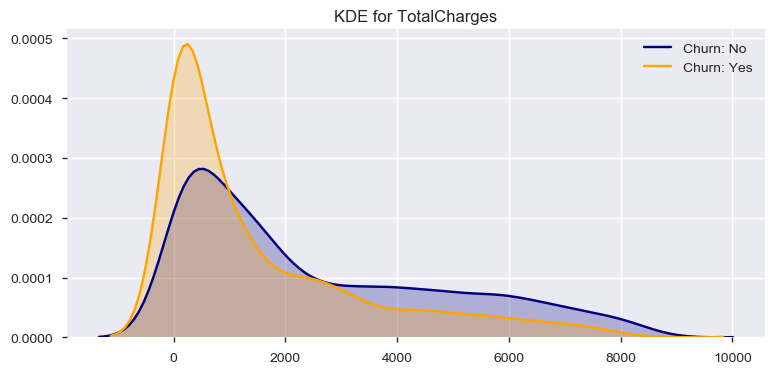

In [14]:
def kde_plot(feature):
    plt.figure(figsize=(9, 4),facecolor='w')
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(telecom_data[telecom_data['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No',shade=True)
    ax1 = sns.kdeplot(telecom_data[telecom_data['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes',shade=True)
kde_plot('tenure')
kde_plot('MonthlyCharges')
kde_plot('TotalCharges')

From above plots, we can deduce 
1. Recently added customers are more churning out
2. Customers with high "Monthly charges", more churn occuring 
3. Tenure and Monthly charges are big concerns for telecom company

In [15]:
avg = telecom_data.replace('Yes',1).replace('No', 0).groupby('Count_OnlineServices', as_index=False)[['Churn']].mean()
avg[['Churn']] = np.round(avg[['Churn']], 2) * 100

In [16]:
avg

,Count_OnlineServices,Churn
0,0,21.0
1,1,46.0
2,2,36.0
3,3,27.0
4,4,22.0
5,5,12.0
6,6,5.0


Text(0.5, 1.0, 'No. of Services Availed Vs Percentage of Churn')

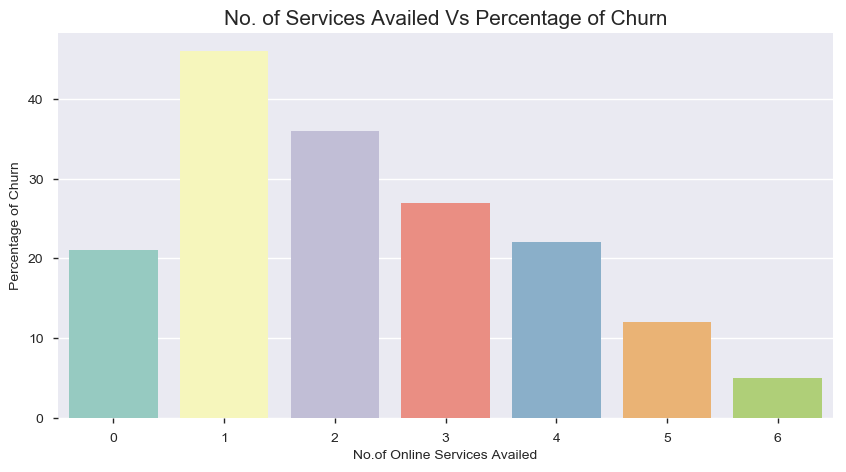

In [17]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x='Count_OnlineServices', y='Churn', data=avg, palette='Set3')
ax.set_xlabel('No.of Online Services Availed', fontsize=10)
ax.set_ylabel('Percentage of Churn', fontsize=10)
ax.set_title('No. of Services Availed Vs Percentage of Churn', fontsize=15)

From the above plot : Customers who availed one online services are most churned and customers who availed most online services are less churned. 
And who are availed no online services are less churned

In [18]:
avg=telecom_data.replace('Yes',1).replace('No', 0).groupby('Count_OnlineServices', as_index=False)[['Churn']].mean()

In [19]:
avg

,Count_OnlineServices,Churn
0,0,0.214060
1,1,0.457557
2,2,0.358180
3,3,0.273703
4,4,0.223005
5,5,0.124343
6,6,0.052817


In [20]:
avg = telecom_data.replace('Yes',1).replace('No', 0).groupby('Count_OnlineServices', as_index=False)[['MonthlyCharges']].mean()
avg

,Count_OnlineServices,MonthlyCharges
0,0,32.792902
1,1,65.574275
2,2,72.417473
3,3,80.110510
4,4,87.771538
5,5,92.176007
6,6,99.365317


In [21]:
avg[['MonthlyCharges']] = np.round(avg[['MonthlyCharges']], 0)

In [22]:
avg

,Count_OnlineServices,MonthlyCharges
0,0,33.0
1,1,66.0
2,2,72.0
3,3,80.0
4,4,88.0
5,5,92.0
6,6,99.0


Text(0.5, 1.0, 'Avg Monthly Charges vs No.of Services')

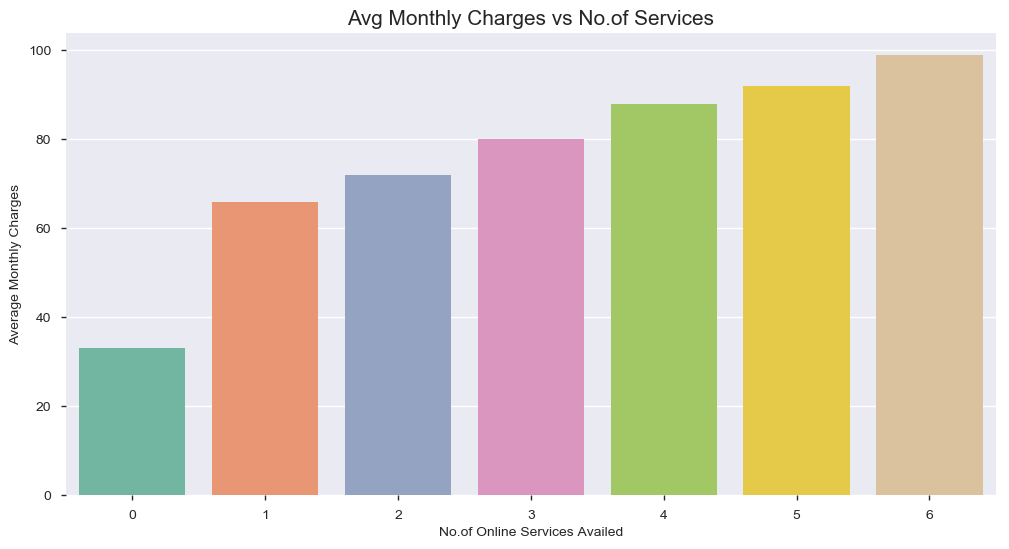

In [23]:
plt.figure(figsize=(12,6))
ax = sns.barplot(y='MonthlyCharges', x='Count_OnlineServices', data=avg, palette='Set2')
ax.set_xlabel('No.of Online Services Availed', fontsize=10)
ax.set_ylabel('Average Monthly Charges',  fontsize=10)
ax.set_title('Avg Monthly Charges vs No.of Services', fontsize=15)

From the above plot : 
1. Customers who does not avail any internet service are paying just $33

2. While those with one service are paying double $66. As the number of services availed increases, the Average Monthly Charges are increasing linearly

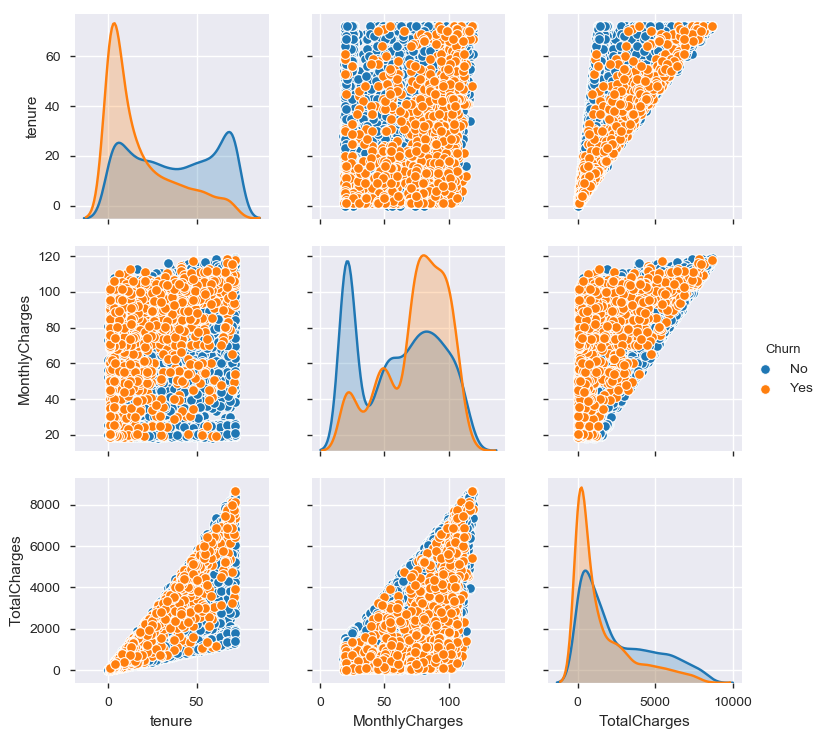

In [24]:
sns.pairplot(telecom_data,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

In [25]:
telecom_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Count_OnlineServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.500000,No,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,Yes,2
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,No,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,Yes,0


Text(0.5, 0, 'Churn')

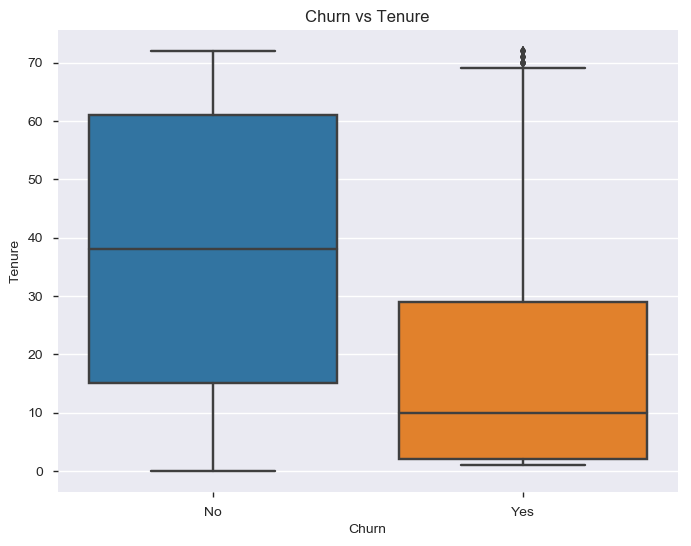

In [26]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Churn', y = 'tenure', data=telecom_data)
ax.set_title('Churn vs Tenure', fontsize=12)
ax.set_ylabel('Tenure', fontsize = 10)
ax.set_xlabel('Churn', fontsize = 10)

From the above plot : Shorter the tenure, higher is the possibility of Churn

Text(0.5, 0, 'Tenure in Months')

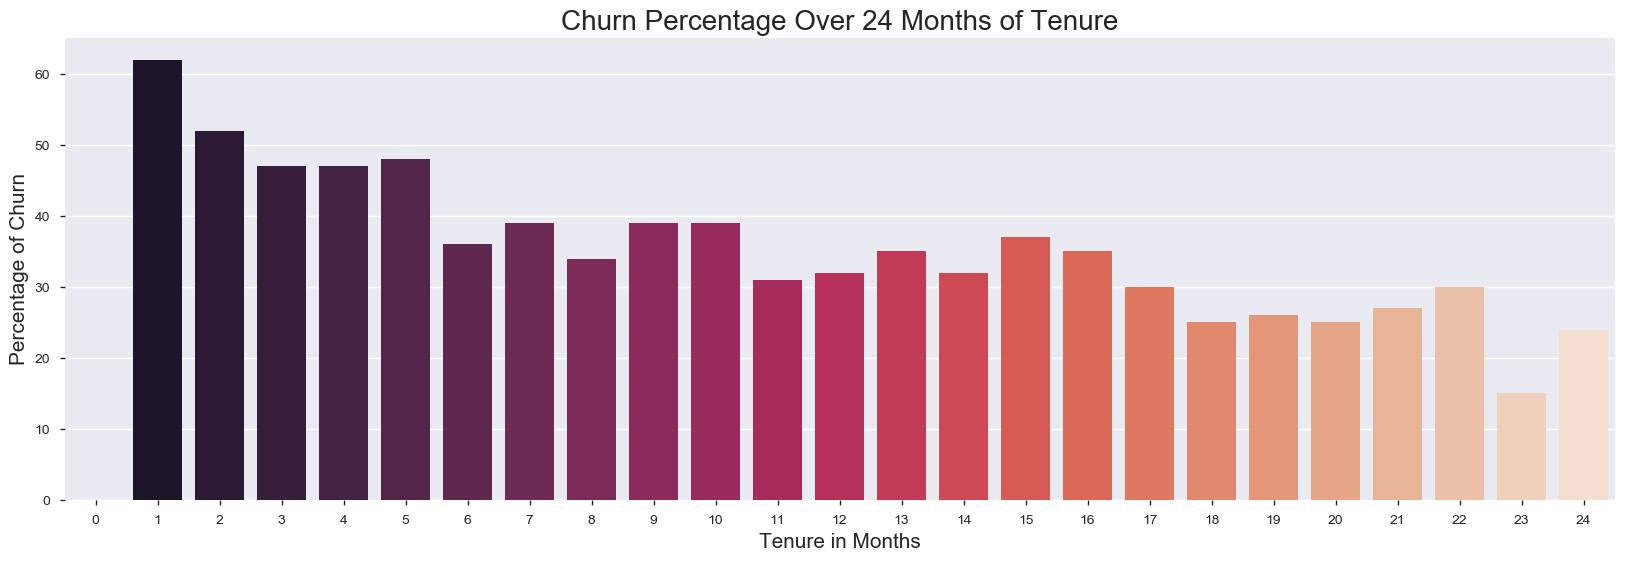

In [28]:
avg = telecom_data.replace('Yes', 1).replace('No', 0).groupby('tenure', as_index=False)[['Churn']].mean()
avg = avg[avg.tenure < 25]
avg['Churn'] = np.round(avg['Churn'], 2) * 100

plt.figure(figsize=(20,6))

ax = sns.barplot(x='tenure', y='Churn', data = avg,palette='rocket')
ax.set_title('Churn Percentage Over 24 Months of Tenure', fontsize=20)
ax.set_ylabel('Percentage of Churn', fontsize = 15)
ax.set_xlabel('Tenure in Months', fontsize = 15)

From above plot : Over 60 percent of customers who complete one month of tenure Churned out. As the length of tenure increases Churn reduces to about 25 percent in 24 months. 

Text(0.5, 0, 'Churn')

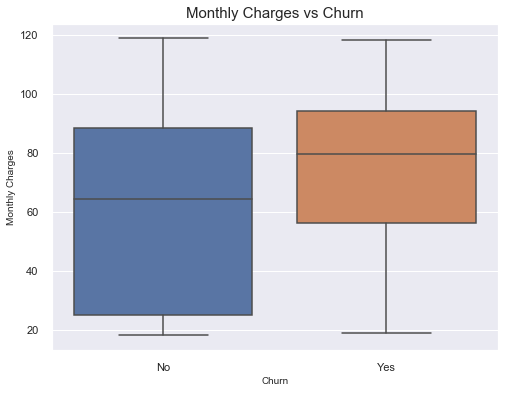

In [29]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=telecom_data)
ax.set_title('Monthly Charges vs Churn', fontsize=15)
ax.set_ylabel('Monthly Charges', fontsize=10)
ax.set_xlabel('Churn', fontsize=10)

##### From the above plot: Higher the monthly charges, more is the possibility of churn, 

non churner customers are paying just over $65, 

while customer churners are paying nearly $80 

In [30]:
telecom_data.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Count_OnlineServices
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1


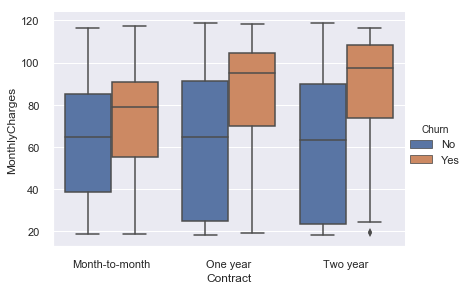

In [26]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=telecom_data, height=4.2, aspect=1.4)

Longer contracts are more affected by higher monthly charges (for churn rate)

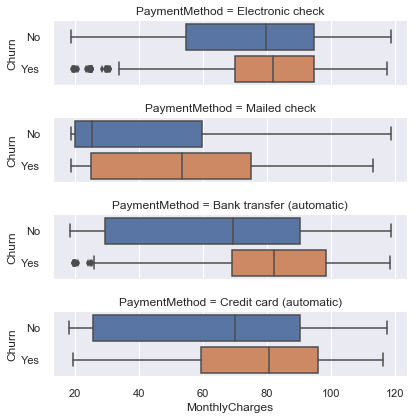

In [49]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=telecom_data, height=1.5, aspect=4, orient='h')

Those Customers with paperless billing are more probable to churn

The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


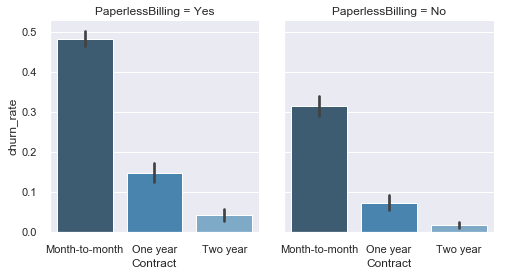

In [51]:
telecom_data['churn_rate'] = telecom_data['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(telecom_data, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

Customers with paperless billing are more probable to churn

The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate

Short term contracts have higher churn rates

In [22]:
telecom_data_services = telecom_data[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies'
                                       ,'TechSupport', 'StreamingTV', 'OnlineBackup', 'Churn']]
telecom_data_services.replace(to_replace='Yes', value=1, inplace=True)
telecom_data_services.replace(to_replace='No', value=0, inplace=True)
telecom_data_services = telecom_data_services[telecom_data_services.OnlineSecurity !='No internet service']             
avg = telecom_data_services.groupby('Churn', as_index=False)[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']].sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3798: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


Text(0.5, 1.0, 'Which Service Customers Churn Higher')

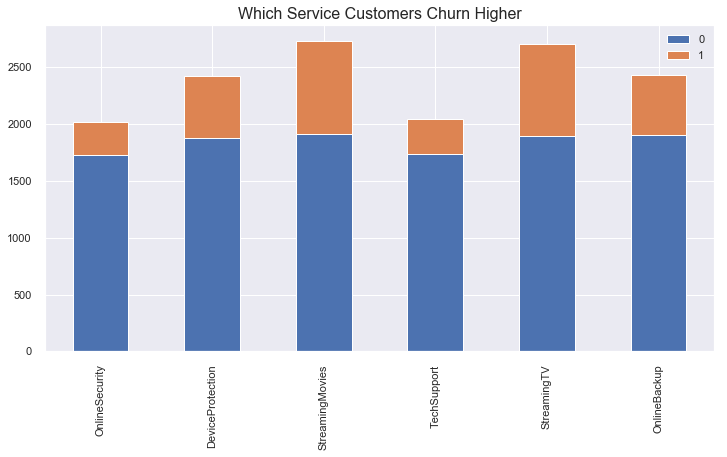

In [31]:
ax = avg.set_index('Churn').T.plot(kind='bar', stacked=True, figsize=(12,6))
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')
ax.set_title('Which Service Customers Churn Higher', fontsize=16)

From the above plot: Customers who are availing Streaming Movies and StreamingTV are churning in higher proportions

Text(0.5, 1.0, 'Gender Distribution')

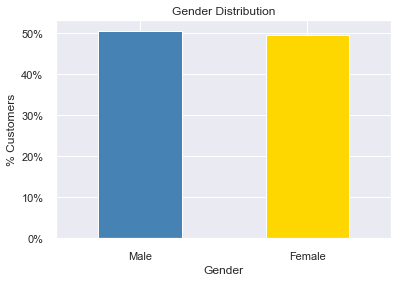

In [34]:
colors = ['#4682B4','#FFD700']
ax = (telecom_data['gender'].value_counts()*100.0 /len(telecom_data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# set individual bar lables using above list
#total = sum(totals)

#for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
#    ax.text(i.get_x()+.15, i.get_height()-3.5, \
#            str(round((i.get_height()/total), 1))+'%',
 #           fontsize=12,
#            color='white',
#           weight = 'bold')

From the above plot : Gender distribution is almost same between male and female

Text(0.5, 1.0, '% of Senior Citizens')

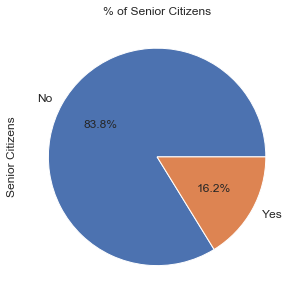

In [44]:

ax = (telecom_data['SeniorCitizen'].value_counts()*100.0 /len(telecom_data))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

2. **% Senior Citizens** - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.


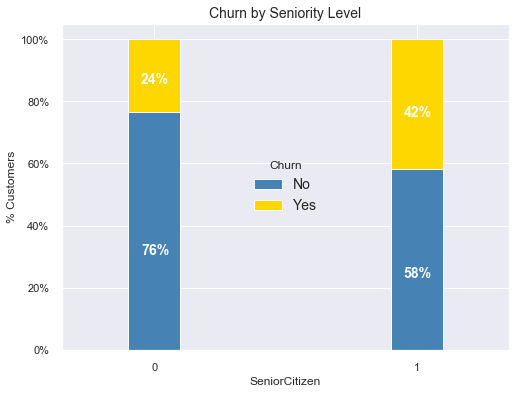

In [21]:
colors = ['#4682B4','#FFD700']
senior_citizen_churn = telecom_data.groupby(['SeniorCitizen','Churn']).size().unstack()

ax = (senior_citizen_churn.T*100.0 / senior_citizen_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by Seniority Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

From above plot:

Senior Citizens have almost double the churn rate than younger population

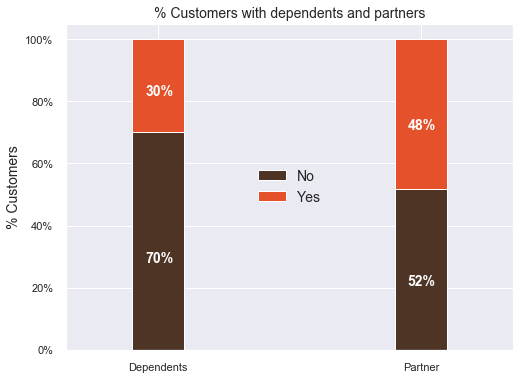

In [20]:
df2 = pd.melt(telecom_data, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(telecom_data)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

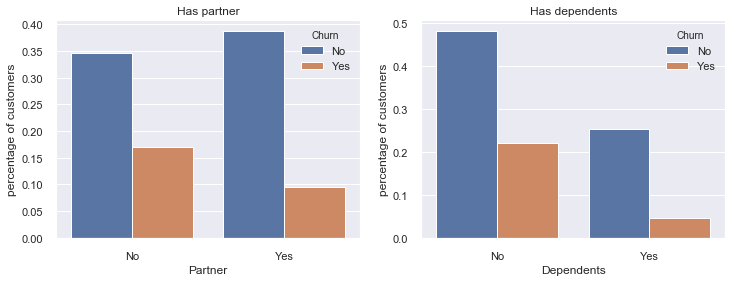

In [47]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = telecom_data.groupby('Partner')["Churn"].value_counts()/len(telecom_data)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = telecom_data.groupby('Dependents')["Churn"].value_counts()/len(telecom_data)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
#colors = ['#4D3425','#E4512B']
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

From the above plot:
* Customers that doesn't have partners are more likely to churn
* Customers without dependents are also more likely to churn

Text(0.5, 1.0, 'Which Service Customers Churn Higher')

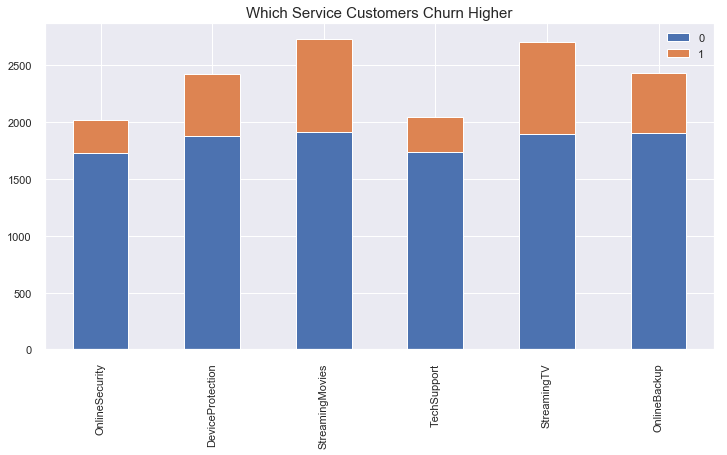

In [38]:
ax = avg.set_index('Churn').T.plot(kind='bar', stacked=True, figsize=(12,6))
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')
ax.set_title('Which Service Customers Churn Higher', fontsize=15)

From the above plot:
    Customers who are availing Streaming Movies and StreamingTV are churning in higher proportions

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

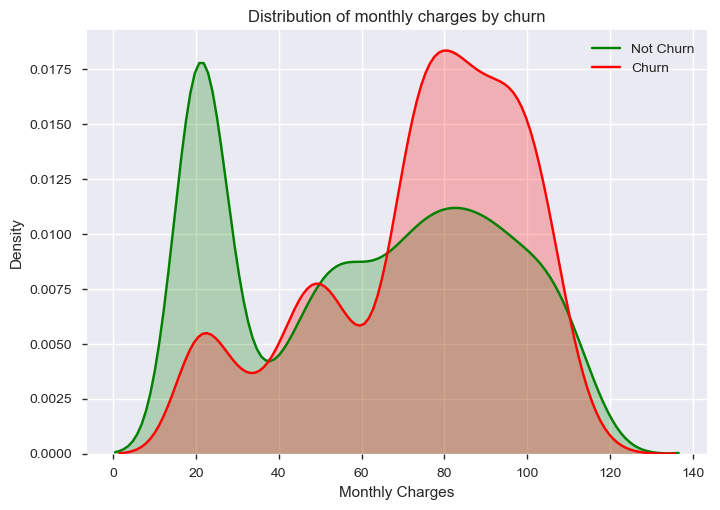

In [39]:
ax = sns.kdeplot(telecom_data.MonthlyCharges[(telecom_data["Churn"] == 'No') ],
                color="Green", shade = True)
ax = sns.kdeplot(telecom_data.MonthlyCharges[(telecom_data["Churn"] == 'Yes') ],
                ax =ax, color="Red", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

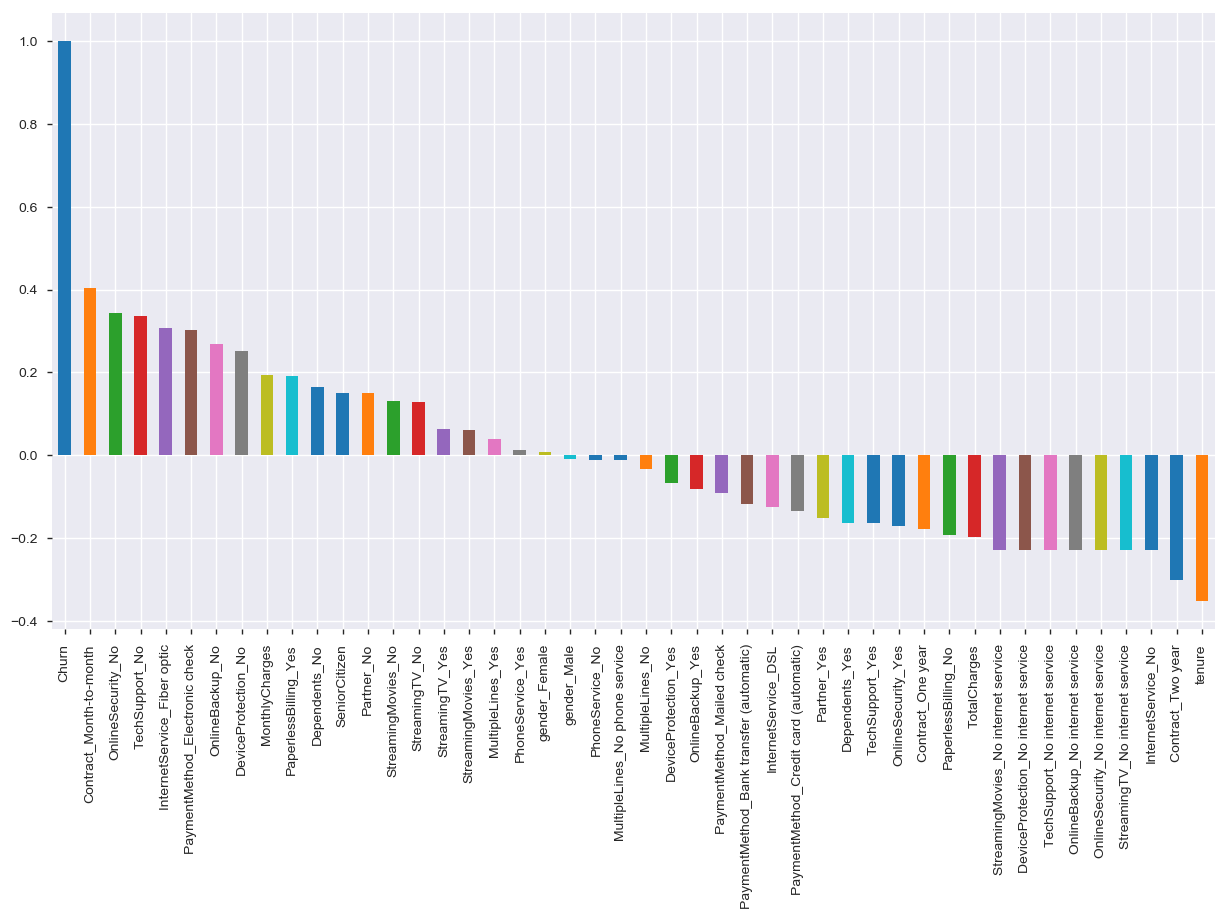

In [15]:
data1 = telecom_data.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
data1['Churn'].replace(to_replace='Yes', value=1, inplace=True)
data1['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
data1_dummies = pd.get_dummies(data1)
data1_dummies.head()
plt.figure(figsize=(15,8))
data1_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

From the above plot:

1. Contracts of the Month to month, absence of online security and tech support seems to be positively correlated with churn. While, the tenure, two year contracts seem to be negatively correlated with churn.

2. Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn



Text(0.5, 1.0, 'Churn by Online Security Service')

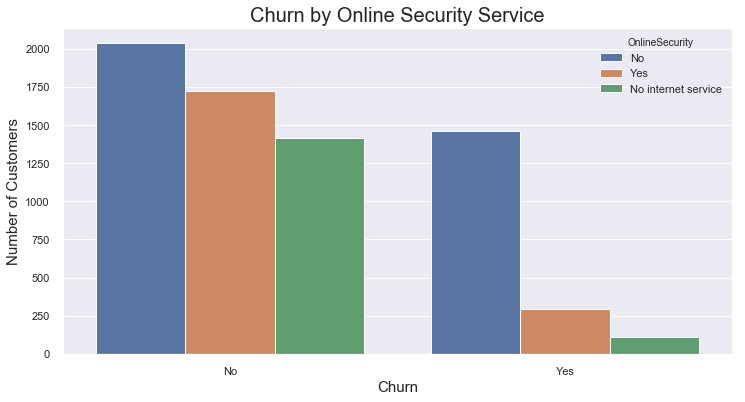

In [36]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="OnlineSecurity", data=telecom_data);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn by Online Security Service', fontsize=20)

Customers who have not availed OnlineSecurity service are churning in higher proportion

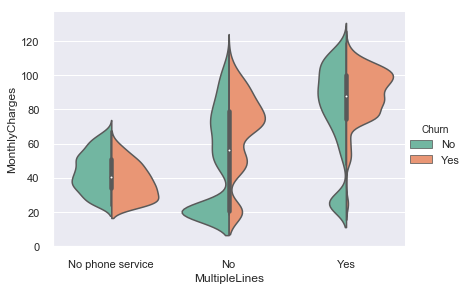

In [41]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="Set2", data=telecom_data, height=4.2, aspect=1.4)

Few customers doesn't have phone service
* Customers with multiple lines have a slightly higher churn rate